In [ ]:
# нужные библиотеки на 10: хотя бы 7 модулей из re, bs4, pandas, matplotlib, seaborn, scikit/statsmodels, requests, json, любой_парсинг_файлов

# на 7:  хотя бы 4 модуля из {pandas, matplotlib, seaborn, scikit/statsmodels, requests, json}

# Показать все строки (удобно, чтобы проверять датасет целиком)
# pd.set_option('display.max_rows', None)

In [ ]:
import requests
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import ttest_ind
import scipy.stats as stats

#from scipy import stats и import scipy.stats as stats по сути одно и то же, нужно решить какую оставить

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
vacancies_dff = pd.read_excel("vacancies_ruri.xlsx")
vacancies_dff

,name,area,employer,salary_from,salary_to,currency,experience,schedule,required_skills
0,Аналитик данных (Data Analyst),Москва,Национальный исследовательский университет Выс...,80000,100000,RUR,Нет опыта,Полный день,EXCEL
1,Аналитик данных,Москва,Азбука вкуса,200000,200000,RUR,От 1 года до 3 лет,Полный день,"EXCEL, SQL"
2,Аналитик данных - Data Analyst (middle),Москва,Smartis,180000,210000,RUR,От 1 года до 3 лет,Удаленная работа,SQL
3,Аналитик данных,Москва,AYA GAMES,250000,400000,RUR,От 1 года до 3 лет,Полный день,"SQL, PYTHON"
4,Аналитик данных / Exсel - в офисе,Москва,РемМастер,100000,150000,RUR,От 1 года до 3 лет,Полный день,NaN
...,...,...,...,...,...,...,...,...,...
549,Технолог (машиностроение)/Помощник руководител...,Санкт-Петербург,НТЦ Победа,80000,100000,RUR,От 1 года до 3 лет,Полный день,NaN
550,Технический руководитель проекта (инженерные с...,Санкт-Петербург,Энергия Холода,115000,150000,RUR,От 1 года до 3 лет,Полный день,NaN
551,Руководитель проекта (автоматизация энергетиче...,Санкт-Петербург,Энергопромавтоматизация,100000,115000,RUR,От 1 года до 3 лет,Полный день,NaN
552,"Менеджер по производству, менеджер проектов",Санкт-Петербург,Инжтехсервис-Спб,80000,130000,RUR,От 1 года до 3 лет,Полный день,NaN


In [ ]:
# Фильтрация данных по городам Москва и Санкт-Петербург

vacancies_df = vacancies_dff[vacancies_dff['area'].isin(['Москва', 'Санкт-Петербург', 'Зеленоград', 'Колпино'])].copy()
vacancies_df['average_salary'] = (vacancies_df['salary_from'] + vacancies_df['salary_to']) / 2
vacancies_df

,name,area,employer,salary_from,salary_to,currency,experience,schedule,required_skills,average_salary
0,Аналитик данных (Data Analyst),Москва,Национальный исследовательский университет Выс...,80000,100000,RUR,Нет опыта,Полный день,EXCEL,90000.0
1,Аналитик данных,Москва,Азбука вкуса,200000,200000,RUR,От 1 года до 3 лет,Полный день,"EXCEL, SQL",200000.0
2,Аналитик данных - Data Analyst (middle),Москва,Smartis,180000,210000,RUR,От 1 года до 3 лет,Удаленная работа,SQL,195000.0
3,Аналитик данных,Москва,AYA GAMES,250000,400000,RUR,От 1 года до 3 лет,Полный день,"SQL, PYTHON",325000.0
4,Аналитик данных / Exсel - в офисе,Москва,РемМастер,100000,150000,RUR,От 1 года до 3 лет,Полный день,NaN,125000.0
...,...,...,...,...,...,...,...,...,...,...
549,Технолог (машиностроение)/Помощник руководител...,Санкт-Петербург,НТЦ Победа,80000,100000,RUR,От 1 года до 3 лет,Полный день,NaN,90000.0
550,Технический руководитель проекта (инженерные с...,Санкт-Петербург,Энергия Холода,115000,150000,RUR,От 1 года до 3 лет,Полный день,NaN,132500.0
551,Руководитель проекта (автоматизация энергетиче...,Санкт-Петербург,Энергопромавтоматизация,100000,115000,RUR,От 1 года до 3 лет,Полный день,NaN,107500.0
552,"Менеджер по производству, менеджер проектов",Санкт-Петербург,Инжтехсервис-Спб,80000,130000,RUR,От 1 года до 3 лет,Полный день,NaN,105000.0


In [ ]:
print(vacancies_df['required_skills'].dtype)

object


In [ ]:
# Статистическая сводка по числовым данным (зарплата)
salary_stats = vacancies_df[['salary_from', 'salary_to']].describe().round(2)

# Средняя зарплата
vacancies_df['average_salary'] = vacancies_df[['salary_from', 'salary_to']].mean(axis=1)

# Статистики по средней зарплате
average_salary_stats = vacancies_df['average_salary'].describe().round(2)

# Выводим статистику
print("Статистика по зарплатам:\n", salary_stats)
print("\nСтатистика по средней зарплате:\n", average_salary_stats)

Статистика по зарплатам:
        salary_from  salary_to
count       551.00     551.00
mean     101581.98  159064.73
std       42274.25   85003.06
min       20000.00   30000.00
25%       75000.00  100000.00
50%       90000.00  137000.00
75%      120000.00  195000.00
max      350000.00  700000.00

Статистика по средней зарплате:
 count       551.00
mean     130323.36
std       59233.07
min       25000.00
25%       92250.00
50%      115000.00
75%      153000.00
max      450000.00
Name: average_salary, dtype: float64


In [ ]:
# Частоты для категориальных переменных
experience_counts = vacancies_df['experience'].value_counts()
schedule_counts = vacancies_df['schedule'].value_counts()
area_counts = vacancies_df['area'].value_counts()

# Выводим частоты
print("\nЧастоты по опыту:\n", experience_counts)
print("\nЧастоты по расписанию:\n", schedule_counts)
print("\nЧастоты по региону:\n", area_counts)


Частоты по опыту:
 experience
От 1 года до 3 лет    484
Нет опыта              67
Name: count, dtype: int64

Частоты по расписанию:
 schedule
Полный день         405
Удаленная работа    142
Гибкий график         3
Сменный график        1
Name: count, dtype: int64

Частоты по региону:
 area
Москва             393
Санкт-Петербург    152
Зеленоград           5
Колпино              1
Name: count, dtype: int64


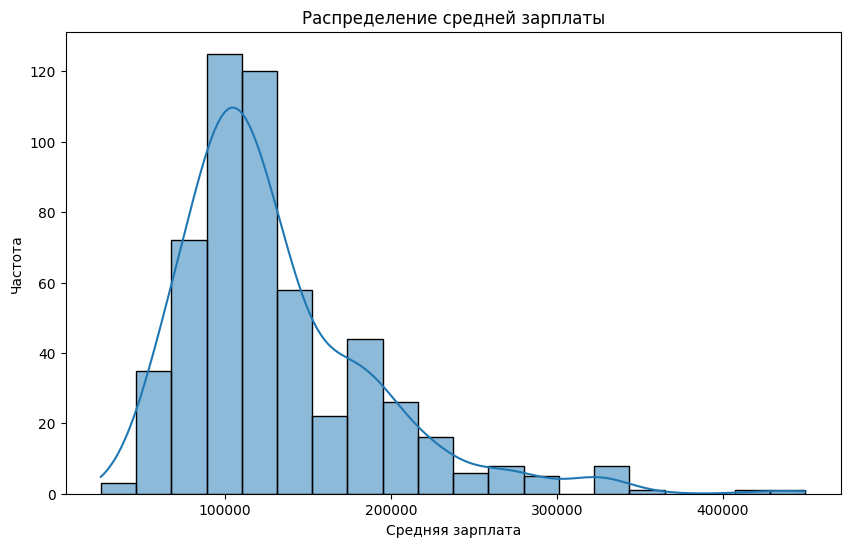

In [ ]:
# Гистограмма для средней зарплаты

plt.figure(figsize=(10, 6))
sns.histplot(vacancies_df['average_salary'], kde=True, bins=20)
plt.title('Распределение средней зарплаты')
plt.xlabel('Средняя зарплата')
plt.ylabel('Частота')
plt.savefig('zp.png', dpi=300, bbox_inches='tight')
plt.show()

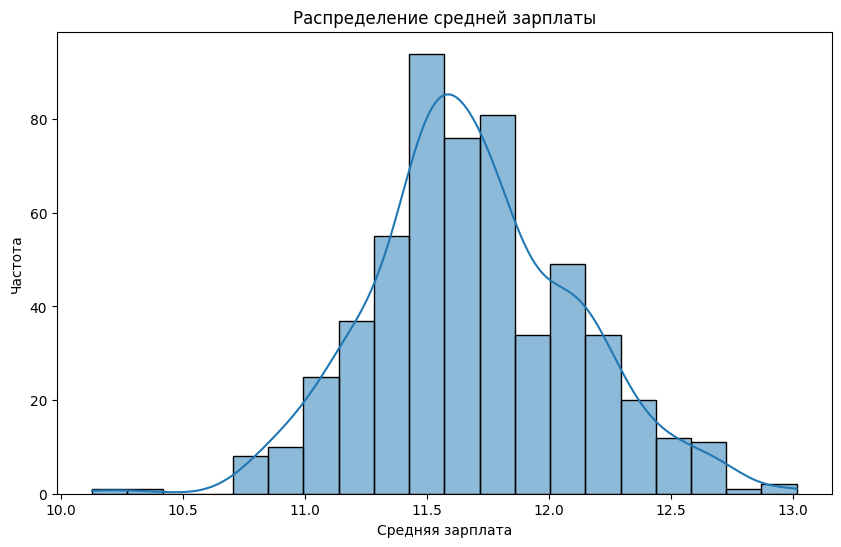

In [ ]:
# Гистограмма для средней зарплаты (log)

vacancies_df['log_salary'] = np.log(vacancies_df['average_salary'])
plt.figure(figsize=(10, 6))
sns.histplot(vacancies_df['log_salary'], kde=True, bins=20)
plt.title('Распределение средней зарплаты')
plt.xlabel('Средняя зарплата')
plt.ylabel('Частота')
plt.savefig('zplog.png', dpi=300, bbox_inches='tight')
plt.show()

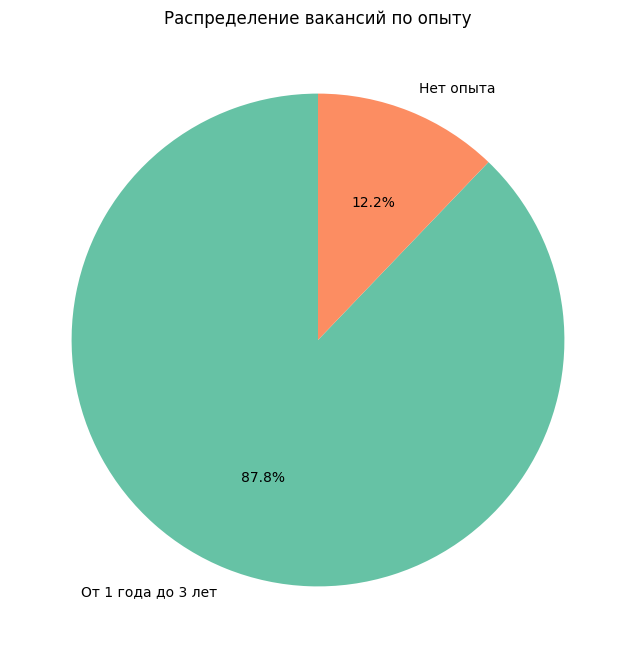

In [ ]:
# Pie chart для переменной experience

plt.figure(figsize=(8, 8))
experience_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(experience_counts)))
plt.title('Распределение вакансий по опыту')
plt.ylabel('')
plt.savefig('experince.png', dpi=300, bbox_inches='tight')
plt.show()

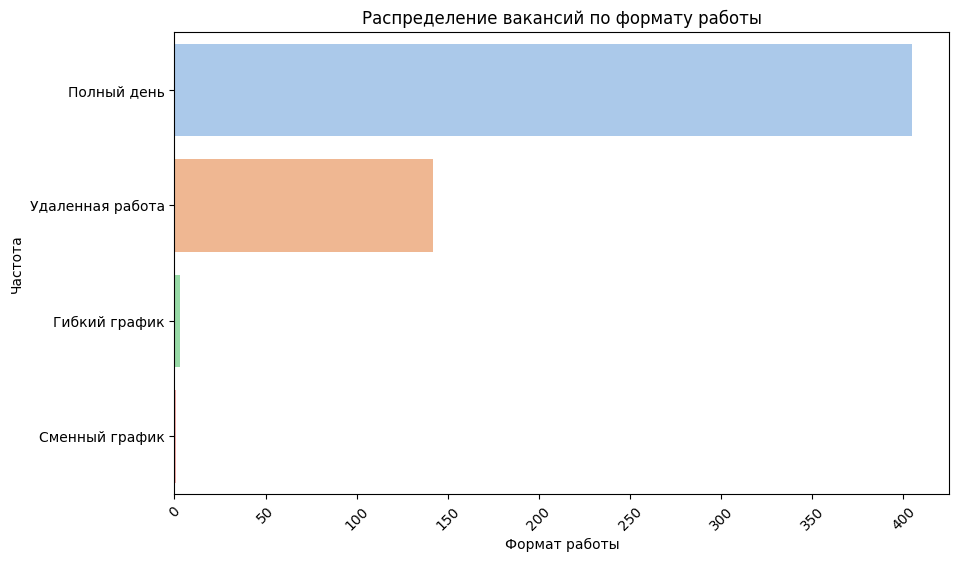

In [ ]:
#Bar chart для переменной schedule

plt.figure(figsize=(10, 6))
sns.countplot(
    y='schedule',
    data=vacancies_df,
    palette="pastel",
    order=vacancies_df['schedule'].value_counts().index
)
plt.title('Распределение вакансий по формату работы')
plt.xlabel('Формат работы')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.savefig('schedule.png', dpi=300, bbox_inches='tight')
plt.show()

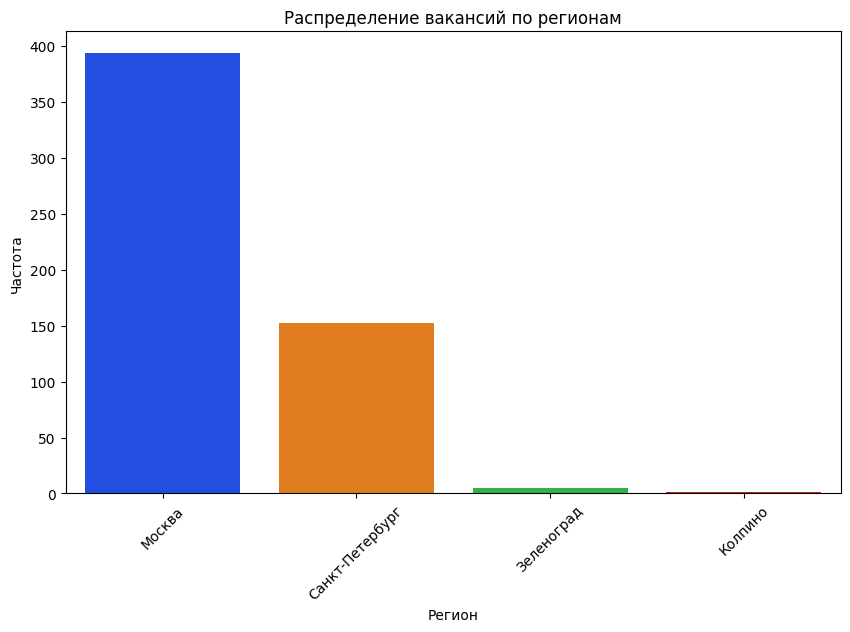

In [ ]:
#Распределение вакансий по Москве, Санкт-Петербургу, Зеленограду и Колпино

plt.figure(figsize=(10, 6))
sns.countplot(x='area', data=vacancies_df, palette="bright")
plt.title('Распределение вакансий по регионам')
plt.xlabel('Регион')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.savefig('regions.png', dpi=300, bbox_inches='tight')
plt.show()

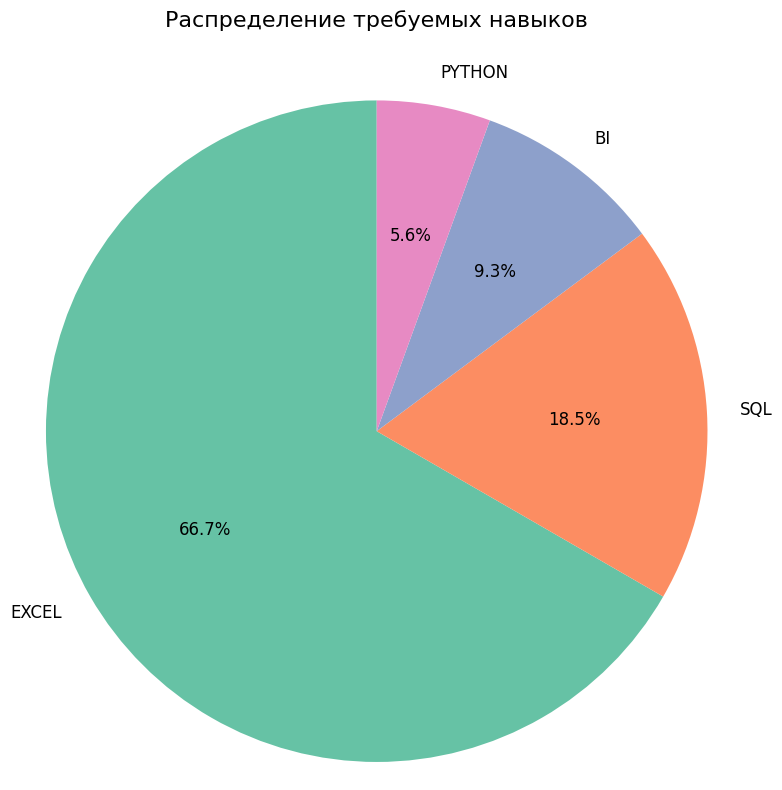

In [ ]:
# Pie chart для переменной required_skills

skills_counts = vacancies_df['required_skills'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(8, 8))

plt.pie(
    skills_counts,
    labels=skills_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2', len(skills_counts)),
    textprops={'fontsize': 12}
)

plt.title('Распределение требуемых навыков', pad=40,fontsize=16)
plt.axis('equal')

plt.tight_layout()
plt.savefig('skills.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#ГИПОТЕЗА 2

# Нулевая гипотеза (H₀): Средний требуемый опыт не зависит от формата работы.
# Альтернативная гипотеза (H₁): Вакансии с удаленной работой требуют большего опыта.

filtered_df = vacancies_df[
    (vacancies_df['experience'].isin(["Нет опыта", "От 1 года до 3 лет"])) &
    (vacancies_df['schedule'].isin(["Полный день", "Удаленная работа"]))]


contingency_table = pd.crosstab(filtered_df['schedule'], filtered_df['experience'])


print("Контингентная таблица:\n", contingency_table)

#Тест Хи-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)


print(f"\nChi-square test: χ² = {chi2_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Требования к опыту различаются между офисными и удаленными вакансиями.")
else:
    print("Не отвергаем нулевую гипотезу: Нет значимой разницы в требованиях к опыту.")


Контингентная таблица:
 experience        Нет опыта  От 1 года до 3 лет
schedule                                       
Полный день              56                 349
Удаленная работа          9                 133

Chi-square test: χ² = 4.9391, p-value = 0.0263
Отвергаем нулевую гипотезу: Требования к опыту различаются между офисными и удаленными вакансиями.


<Figure size 800x500 with 0 Axes>

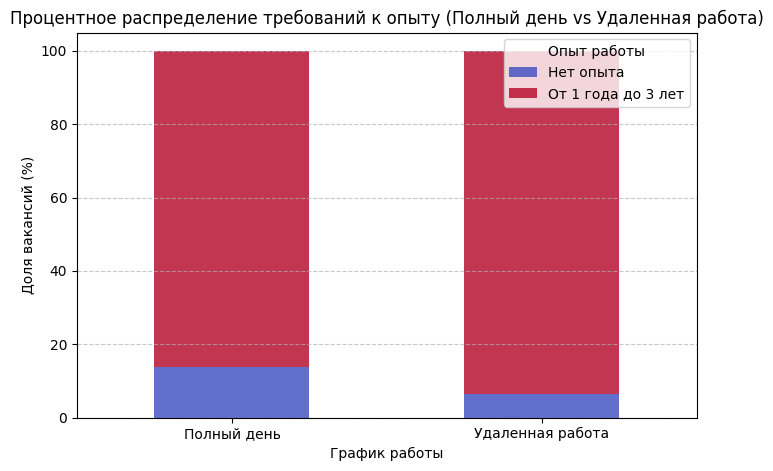

In [ ]:
#Построение графика для гипотезы №2
filtered_contingency = contingency_table.loc[["Полный день", "Удаленная работа"]]
filtered_contingency_percent = filtered_contingency.div(filtered_contingency.sum(axis=1), axis=0) * 100


plt.figure(figsize=(8, 5))
filtered_contingency_percent.plot(kind='bar', stacked=True, colormap="coolwarm", alpha=0.8, figsize=(8,5))
plt.xlabel("График работы")
plt.ylabel("Доля вакансий (%)")
plt.title("Процентное распределение требований к опыту (Полный день vs Удаленная работа)")
plt.legend(title="Опыт работы")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
print(vacancies_df)

                                                  name             area  \
0                       Аналитик данных (Data Analyst)           Москва   
1                                      Аналитик данных           Москва   
2              Аналитик данных - Data Analyst (middle)           Москва   
3                                      Аналитик данных           Москва   
4                    Аналитик данных / Exсel - в офисе           Москва   
..                                                 ...              ...   
549  Технолог (машиностроение)/Помощник руководител...  Санкт-Петербург   
550  Технический руководитель проекта (инженерные с...  Санкт-Петербург   
551  Руководитель проекта (автоматизация энергетиче...  Санкт-Петербург   
552        Менеджер по производству, менеджер проектов  Санкт-Петербург   
553                 Руководитель проекта строительства  Санкт-Петербург   

                                              employer  salary_from  \
0    Национальный исследоват

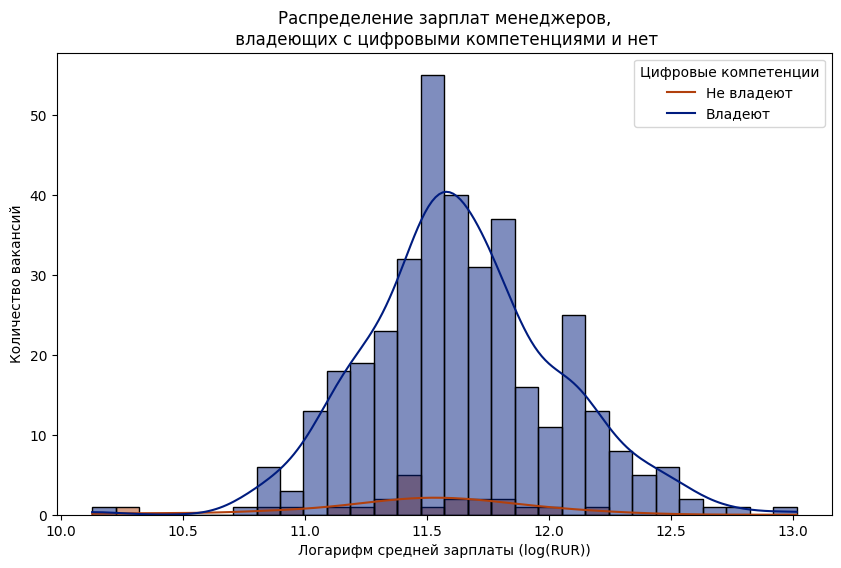

T-статистика: -2.029318226312599, P-значение: 0.04310803126793174
Есть статистически значимые различия.


In [ ]:
#ГИПОТЕЗА 3


df_managers = vacancies_df[vacancies_df['name'].str.contains('Manager|Менеджер', case=False, na=False)].copy()


digital_skills = ['BI', 'EXCEL', 'SQL', 'PYTHON']


def has_digital_skills(skills):
    if pd.isna(skills):
        return False
    return any(skill in skills for skill in digital_skills)


df_managers['has_digital_skills'] = df_managers['required_skills'].apply(has_digital_skills)


df_managers['average_salary'] = (df_managers['salary_from'] + df_managers['salary_to']) / 2


df_managers['log_average_salary'] = np.log(df_managers['average_salary'] + 1)


with_digital_skills = df_managers[df_managers['has_digital_skills']]
without_digital_skills = df_managers[~df_managers['has_digital_skills']]

#Построение графика для гипотезы №3
plt.figure(figsize=(10, 6))
sns.histplot(data=df_managers, x='log_average_salary', hue='has_digital_skills', kde=True, palette='dark', bins=30)
plt.title('Распределение зарплат менеджеров,\n владеющих с цифровыми компетенциями и нет')
plt.xlabel('Логарифм средней зарплаты (log(RUR))')
plt.ylabel('Количество вакансий')
plt.legend(title='Цифровые компетенции', labels=['Не владеют', 'Владеют'])
plt.show()

#T-статистика
t_stat, p_value = ttest_ind(with_digital_skills['log_average_salary'].dropna(), without_digital_skills['log_average_salary'].dropna())
print(f'T-статистика: {t_stat}, P-значение: {p_value}')

if p_value < 0.05:
    print("Есть статистически значимые различия.")
else:
    print("Нет статистически значимых различий.")

In [ ]:
#Прогнозирование средней заработной платы при помощи трех моделей


df = vacancies_df.copy()


df['average_salary'] = df[['salary_from', 'salary_to']].mean(axis=1)


q90 = df['average_salary'].quantile(0.90)
q1 = df['average_salary'].quantile(0.1)
df = df[(df['average_salary'] < q90) & (df['average_salary'] > q1)]


df['name'] = df['name'].fillna('').str.lower()
df['is_middle'] = df['name'].str.contains('middle').astype(int)
df['is_senior'] = df['name'].str.contains('senior|lead|руководител').astype(int)
df['is_junior'] = df['name'].str.contains('junior|стажер|intern').astype(int)
df['is_bi'] = df['name'].str.contains(r'\bbi\b').astype(int)
df['is_ml'] = df['name'].str.contains('ml|машинн').astype(int)
df['is_product'] = df['name'].str.contains('продукт').astype(int)
df['is_sql'] = df['name'].str.contains('sql').astype(int)
df['is_python'] = df['name'].str.contains('python').astype(int)
df['is_excel'] = df['name'].str.contains('excel').astype(int)


df['schedule'] = df['schedule'].fillna('').astype(str)
df['is_remote'] = df['schedule'].str.contains('удален', case=False).astype(int)


cat_features = ['experience', 'schedule']
for col in cat_features:
    df[col] = df[col].fillna('unknown').astype(str)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(df[cat_features])


bin_features = ['is_middle', 'is_senior', 'is_junior', 'is_bi', 'is_ml', 'is_product', 'is_sql', 'is_remote', 'is_python', 'is_excel']
X_bin = df[bin_features].values


X = np.hstack([X_cat, X_bin])
y = df['average_salary'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = {}

#Модель RandomForest
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10]}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                             param_grid=param_grid_rf,
                             cv=3,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1)
grid_search_rf.fit(X_train, y_train)


best_params_rf = grid_search_rf.best_params_


rf = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results['RandomForest'] = np.sqrt(mean_squared_error(y_test, rf_pred))

#Модель LightGBM
param_grid_lgb = {
    'n_estimators': [100, 20, 300],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]}

grid_search_lgb = GridSearchCV(estimator=lgb.LGBMRegressor(random_state=42, verbose=-1),
                              param_grid=param_grid_lgb,
                              cv=3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)


best_params_lgb = grid_search_lgb.best_params_


lgbm = lgb.LGBMRegressor(**best_params_lgb, random_state=42, verbose=-1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
results['LightGBM'] = np.sqrt(mean_squared_error(y_test, lgbm_pred))

#Модель XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]}

grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42, n_jobs=-1),
                              param_grid=param_grid_xgb,
                              cv=3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)


best_params_xgb = grid_search_xgb.best_params_


xgbm = xgb.XGBRegressor(**best_params_xgb, random_state=42, n_jobs=-1)
xgbm.fit(X_train, y_train)
xgbm_pred = xgbm.predict(X_test)
results['XGBoost'] = np.sqrt(mean_squared_error(y_test, xgbm_pred))


for name, rmse in results.items():
    print(f"{name} RMSE: {rmse:.2f}")

RandomForest RMSE: 29252.33
LightGBM RMSE: 28095.70
XGBoost RMSE: 28881.70


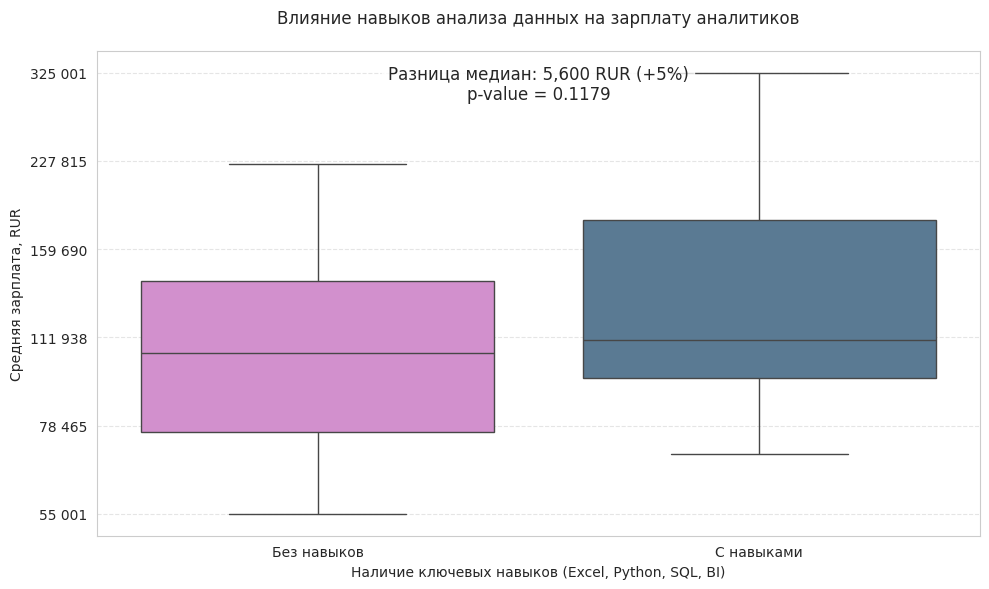


Результаты t-теста:
t-статистика = 1.6093
p-value = 0.1179

Вывод: Различия не достигли статистической значимости (p ≥ 0.05)
Нет убедительных доказательств влияния навыков на зарплату


In [ ]:
#ГИПОТЕЗА 1

df = vacancies_df.copy()
analysts = df[df['name'].str.contains('Аналитик|аналитик данных|data analyst|Data Analyst|аналитик|analyst', case=False, na=False)].copy()
skills = ['EXCEL', 'PYTHON', 'SQL', 'BI', 'POWER BI']
analysts['has_skills'] = analysts['required_skills'].apply(
    lambda x: any(skill in str(x) for skill in skills) if pd.notna(x) else False)


analysts['avg_salary'] = (analysts['salary_from'] + analysts['salary_to']) / 2
analysts['log_salary'] = np.log(analysts['avg_salary'] + 1)  # +1 чтобы избежать log(0)


group_with_skills = analysts[analysts['has_skills']]['log_salary']
group_without_skills = analysts[~analysts['has_skills']]['log_salary']

#Т-статистика
t_stat, p_value = ttest_ind(group_with_skills, group_without_skills, equal_var=False)

#Построение графика для гипотезы №1
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=analysts,
    x='has_skills',
    y='log_salary',
    palette=['#dd85d7', '#507b9c'],
    showfliers=False)


def log_to_actual(x):
    return f"{np.exp(x):,.0f}".replace(",", " ")

salary_levels = np.linspace(analysts['log_salary'].min(), analysts['log_salary'].max(), 6)
ax.set_yticks(salary_levels)
ax.set_yticklabels([log_to_actual(x) for x in salary_levels])


median_no = np.exp(analysts[analysts['has_skills']==False]['log_salary'].median())
median_yes = np.exp(analysts[analysts['has_skills']==True]['log_salary'].median())
diff = median_yes - median_no
percent_diff = (diff / median_no) * 100

stats_text = f'''Разница медиан: {diff:,.0f} RUR (+{percent_diff:.0f}%)
p-value = {p_value:.4f}'''

plt.text(0.5, 0.90,
        stats_text,
        transform=ax.transAxes,
        ha='center',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8))


plt.title('Влияние навыков анализа данных на зарплату аналитиков', pad=20)
plt.xlabel('Наличие ключевых навыков (Excel, Python, SQL, BI)')
plt.ylabel('Средняя зарплата, RUR')
plt.xticks([0, 1], ['Без навыков', 'С навыками'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


print("\nРезультаты t-теста:")
print(f"t-статистика = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("\nВывод: Различия статистически значимы (p < 0.05)")
    print("Зарплаты аналитиков с навыками значимо выше")
else:
    print("\nВывод: Различия не достигли статистической значимости (p ≥ 0.05)")
    print("Нет убедительных доказательств влияния навыков на зарплату")